https://www.kaggle.com/vanshjatana/a-simple-tutorial-to-data-visualization

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
df = pd.DataFrame({'x':np.random.randn(100), 'y':np.random.randn(100), 'z':list('aaaabbbccd')*10})
df['x_int'] = (df['x'].abs() * 10).astype(int)
df['y_int'] = (df['y'].abs() * 10).astype(int)

In [5]:
df.sample(10)

,x,y,z,x_int,y_int
37,-0.088486,-0.666594,c,0,6
69,1.188734,-0.054992,d,11,0
38,-0.000526,-0.899911,c,0,8
28,-1.424844,0.579369,c,14,5
76,0.169646,-1.945205,b,1,19
48,-0.149900,-1.289335,c,1,12
53,-0.116289,-0.122471,a,1,1
63,-0.260038,0.673982,a,2,6
90,1.226876,-1.520645,a,12,15
34,-1.322438,0.609017,b,13,6


In [7]:
import plotly.express as px

dfg = df.groupby('z')['x'].mean().reset_index()
fig = px.bar(dfg, y='x', x='z', color='z', template='ggplot2')
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



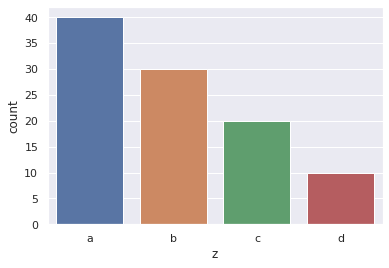

In [8]:
import seaborn as sns
sns.set(style='darkgrid')
ax = sns.countplot(x='z', data=df)

In [0]:
fig = px.histogram(df, x='x', y='y', color='z')
fig.show()

In [0]:
fig = px.density_heatmap(df, x="x", y="y")
fig.show()

In [0]:
fig = px.density_heatmap(df, x="x", y="y", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [0]:
fig = px.histogram(df, x="x", y="y", color="z", marginal="box")
fig.show()

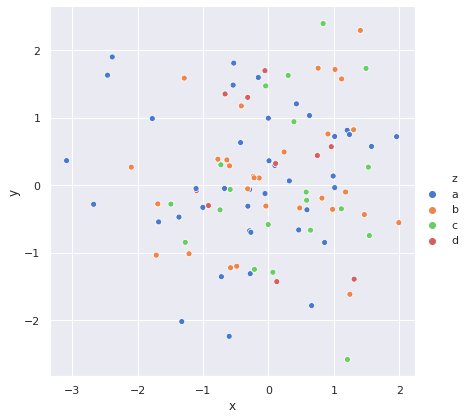

In [0]:
sns.relplot(x="x", y="y", hue="z", palette="muted", height=6, data=df)

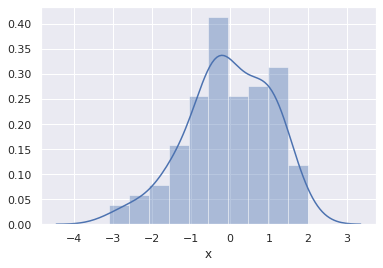

In [0]:
sns.distplot(df['x'], bins=10, kde=True)

In [0]:
dfg = df.groupby(["z"])["x"].mean().reset_index()
fig = px.pie(dfg,
             values="x",
             names="z",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [9]:
fig = px.sunburst(df, parents="x_int", ids='y_int',
                  color='x_int', hover_data=['y_int'],
                  color_continuous_scale='rainbow')
fig.show()

In [0]:
fig = px.scatter(df, x="x", y="y", color='z', trendline="ols")
fig.show()

In [0]:
fig = px.scatter_ternary(df, a="x", b="y", c="x_int", color='z')
fig.show()

In [10]:
pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5428 sha256=ede7f8d73bb291557e6d561caa3e2e350ca8dde88124c75978a1a3faabe7af0b
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [12]:
from bubbly.bubbly import bubbleplot 
from plotly.offline import iplot
#import chart_studio.plotly as py

figure = bubbleplot(dataset=df, x_column='x', y_column='y', 
    bubble_column='z', size_column='y', color_column='z', 
    x_logscale=True, scale_bubble=2, height=350)

iplot(figure)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in log10



ValueError: ignored

In [0]:
pip install calmap

AttributeError: ignored

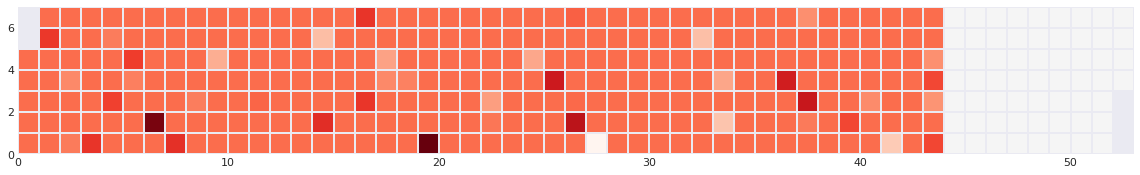

In [0]:
import calmap
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure(figsize=(20,10))
all_days = pd.date_range('1/1/2019', periods=700, freq='D')
days = np.random.choice(all_days, 100)
events = pd.Series(np.random.randn(len(days)), index=days)
calmap.yearplot(events, year=2020)

In [0]:
px.box(df, x='z', y='y', notched=True)

<Figure size 720x432 with 0 Axes>

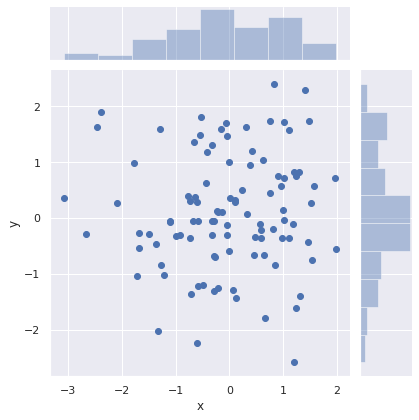

In [0]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.jointplot(x=df["x"], y=df["y"], kind='scatter')

<Figure size 720x432 with 0 Axes>

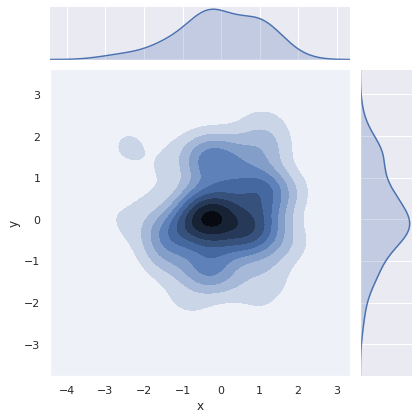

In [0]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.jointplot(x=df["x"], y=df["y"], kind='kde')

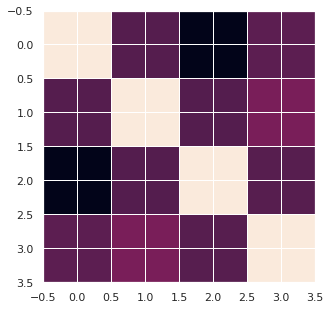

In [0]:
#cor = df.loc[:,["hsc_p","ssc_p","salary"]]
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()
ax.imshow(df.corr())

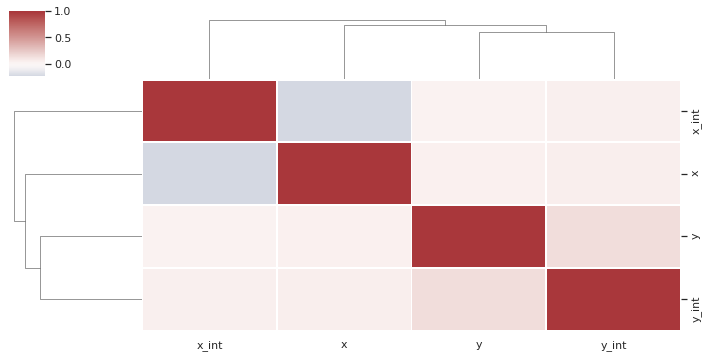

In [0]:
sns.clustermap(df.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(10, 5))

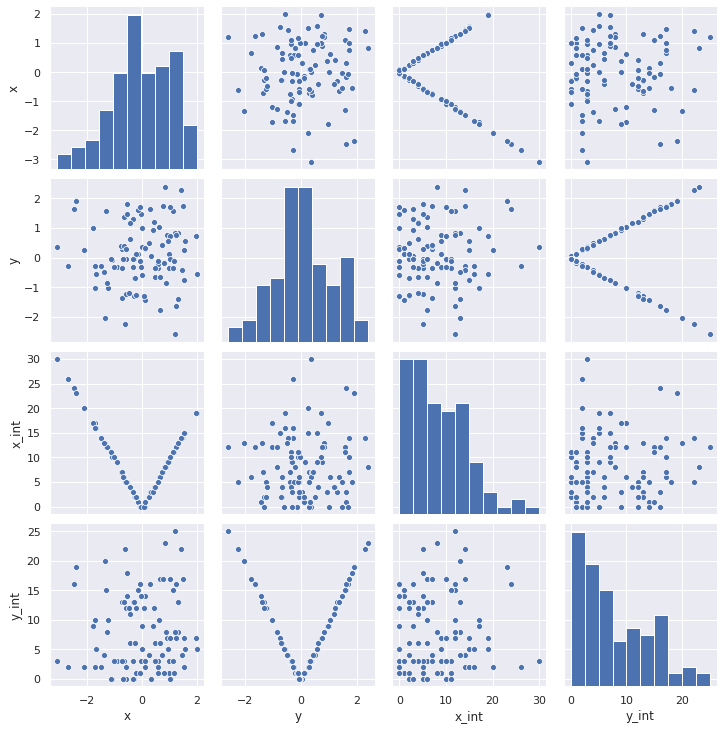

In [0]:
sns.pairplot(df)

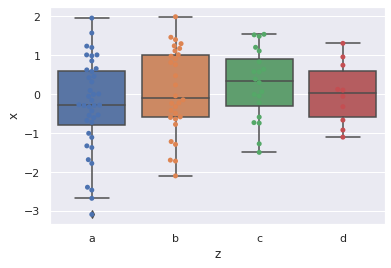

In [0]:
ax = sns.swarmplot(x="z", y="x", data=df)
ax = sns.boxplot(x="z", y="x", data=df)

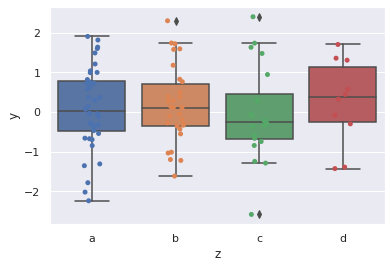

In [0]:
ax = sns.stripplot(x="z", y="y", data=df)
ax = sns.boxplot(x="z", y="y", data=df)

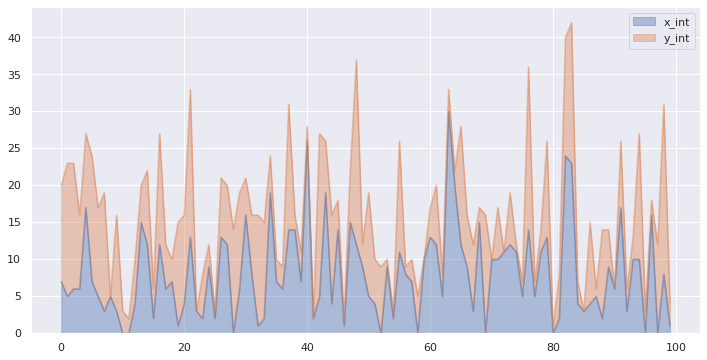

In [0]:
df.plot.area(y=['x_int','y_int'], alpha=0.4, figsize=(12,6))

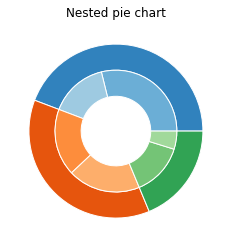

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Useful for:
# A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion
# Nested pie chart goes one step further and separate every outer level of the pie chart
# with the composition on a lower level

# More info: 
# https://en.wikipedia.org/wiki/Pie_chart

# ----------------------------------------------------------------------------------------------------
# get the data
size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

# create the outer and inner colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig, ax = plt.subplots()

# ----------------------------------------------------------------------------------------------------
# plot the data
# outer level
ax.pie(vals.sum(axis = 1), # plot the total [60., 32.] = 92
       radius = 1, 
       colors = outer_colors,
       wedgeprops = dict(width = size, edgecolor = 'w'))

# inner level
ax.pie(vals.flatten(), # using flatten we plot 60, 32 separetly
       radius = 1 - size, 
       colors = inner_colors,
       wedgeprops = dict(width = size, edgecolor = 'w'))

# set the title for the plot
ax.set(aspect = "equal", title = 'Nested pie chart');

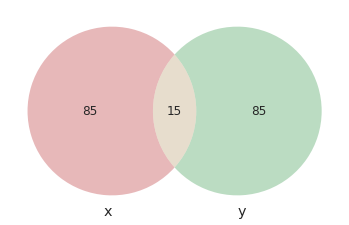

In [13]:
from matplotlib_venn import venn2
sl = df['x']
sw = df['y']
venn2(subsets = (len(sl)-15, len(sw)-15, 15), set_labels = ('x', 'y'))

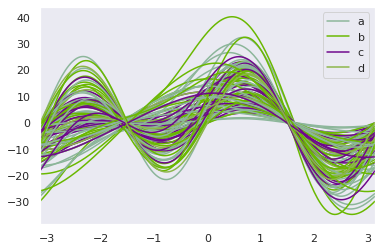

In [14]:
from pandas.plotting import andrews_curves
andrews_curves(df, "z")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



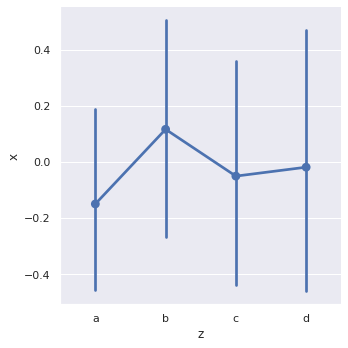

In [17]:
sns.factorplot('z','x',data=df)
plt.ioff()
plt.show()

In [18]:
import plotly.express as px
wind = px.data.wind()
fig = px.bar_polar(wind, r="frequency", theta="direction",
                   color="strength")
fig.show()

In [19]:
wind = px.data.wind()
fig = px.line_polar(wind, r="frequency", theta="direction",
                   color="strength")
fig.show()

In [21]:
import pandas as pd

import plotly.graph_objects as go
fig = go.Figure(go.Densitymapbox(lat=df['x_int'], lon=df['y_int'],
                                 radius=10))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [27]:
dfg = df.groupby(by=['z','x_int']).mean()['y'].reset_index()
fig = px.bar(dfg, x='z', y="y", animation_frame="x_int", 
           animation_group="z", color="z", hover_name="z")
fig.update_layout(title='test')

In [28]:
fig = px.line_3d(df, x="z", y="x", z="y",color = "z")
fig.show()

In [29]:
fig = px.scatter_3d(df, x="z", y="x", z="y",color = "z")
fig.show()

In [32]:
df.head()

,x,y,z,x_int,y_int
0,-0.430166,0.385935,a,4,3
1,0.132918,-2.454632,a,1,24
2,-0.437992,-0.252029,a,4,2
3,-0.826153,1.559424,a,8,15
4,-0.971538,0.237673,b,9,2


In [33]:
dfg = df.groupby(by=['x_int', 'x', 'y'])['y_int'].max().reset_index()
dfg['size'] = dfg['y_int'] * 90000000
fig = px.scatter_mapbox(dfg, lat="x", lon="y",
                     color="y_int", size='size', hover_data=['y_int'],
                     color_continuous_scale='burgyl',
                     animation_frame="x_int")
fig.update(layout_coloraxis_showscale=True)
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3)
fig.show()

In [34]:
import plotly.express as px
dfp = px.data.gapminder()
px.scatter(dfp, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [43]:
import plotly.graph_objects as go

dfg = df.head(20).copy()
fig = go.Figure(data=[go.Table(
    header=dict(values=list(dfg.columns), align='left'),
#    cells=dict(values=[dfg['x'], dfg['y'], dfg['z'], dfg['x_int'], dfg['y_int']], align='left'))
    cells=dict(values=dfg.values.T, align='left'))
])

fig.show()

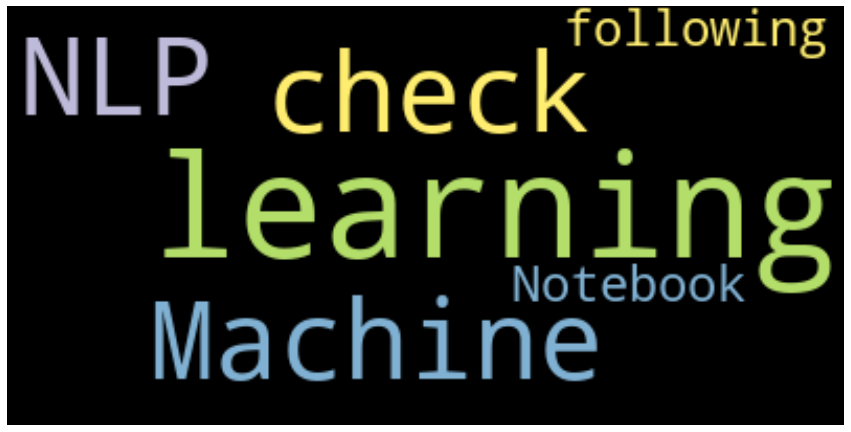

In [42]:
from wordcloud import WordCloud, ImageColorGenerator
#text = " ".join(str(each) for each in word.keyword.unique())
text = 'For learning Machine learning and NLP do check following Notebook'
wordcloud = WordCloud(max_words=200, colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()